In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [4]:
df=pd.read_csv('car data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [7]:
df=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [8]:
df.columns=['y','sprice','pprice','kms','fuel','seller','trans','owner']

In [9]:
df['now']=2021
df['y']=df['now']-df['y']
del df['now']
df.head()

,y,sprice,pprice,kms,fuel,seller,trans,owner
0,7,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,8,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,4,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,10,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,7,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
for field in ['fuel','seller','trans','owner']:
    print(df[field].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [11]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,y,sprice,pprice,kms,owner,fuel_Diesel,fuel_Petrol,seller_Individual,trans_Manual
0,7,3.35,5.59,27000,0,0,1,0,1
1,8,4.75,9.54,43000,0,1,0,0,1
2,4,7.25,9.85,6900,0,0,1,0,1
3,10,2.85,4.15,5200,0,0,1,0,1
4,7,4.60,6.87,42450,0,1,0,0,1


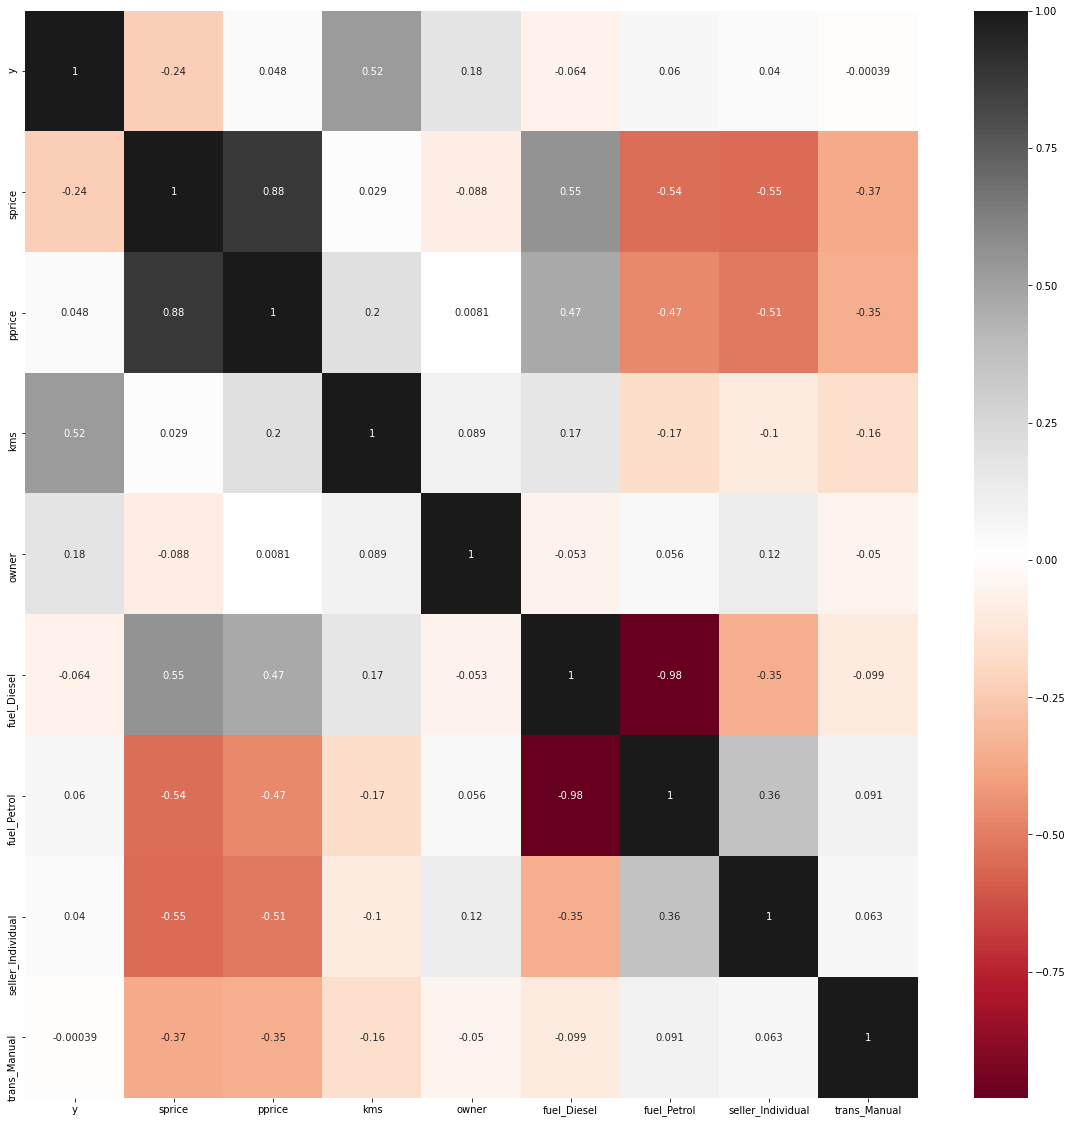

In [12]:
corrmatrix=df.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmatrix,annot=True,cmap='RdGy')

In [13]:
target=df['sprice']
df.drop(['sprice'],axis=1,inplace=True)
df.head()

,y,pprice,kms,owner,fuel_Diesel,fuel_Petrol,seller_Individual,trans_Manual
0,7,5.59,27000,0,0,1,0,1
1,8,9.54,43000,0,1,0,0,1
2,4,9.85,6900,0,0,1,0,1
3,10,4.15,5200,0,0,1,0,1
4,7,6.87,42450,0,1,0,0,1


In [14]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(df,target)

ExtraTreesRegressor()

<AxesSubplot:>

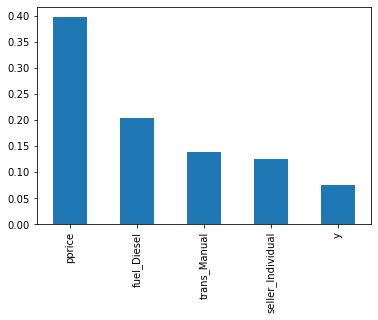

In [15]:
features=pd.Series(model.feature_importances_, index=df.columns)
features.nlargest(5).plot(kind='bar')

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df,target, test_size=0.33)

In [17]:
X_train.shape

(201, 8)

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)

In [19]:
n_estimators=[int(x) for x in np.linspace(100,1000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=10)]

In [20]:
from sklearn.model_selection import RandomizedSearchCV
params={'n_estimators':n_estimators,
        'max_features':max_features,
        'max_depth':max_depth,
       }
print(params)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 7, 10, 13, 16, 18, 21, 24, 27, 30]}


In [21]:
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=params,n_iter=10,cv=10,verbose=2,random_state=42, n_jobs=1)

In [22]:
rf_random.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ..max_depth=16, max_features=sqrt, n_estimators=600; total time=   1.6s
[CV] END ..max_depth=16, max_features=sqrt, n_estimators=600; total time=   1.4s
[CV] END ..max_depth=16, max_features=sqrt, n_estimators=600; total time=   1.3s
[CV] END ..max_depth=16, max_features=sqrt, n_estimators=600; total time=   1.4s
[CV] END ..max_depth=16, max_features=sqrt, n_estimators=600; total time=   2.3s
[CV] END ..max_depth=16, max_features=sqrt, n_estimators=600; total time=   2.2s
[CV] END ..max_depth=16, max_features=sqrt, n_estimators=600; total time=   2.6s
[CV] END ..max_depth=16, max_features=sqrt, n_estimators=600; total time=   2.3s
[CV] END ..max_depth=16, max_features=sqrt, n_estimators=600; total time=   2.2s
[CV] END ..max_depth=16, max_features=sqrt, n_estimators=600; total time=   2.5s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=600; total time=   2.1s
[CV] END ...max_depth=5, max_features=sqrt, n_

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 7, 10, 13, 16, 18, 21,
                                                      24, 27, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [23]:
predicted=rf_random.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sprice', ylabel='Density'>

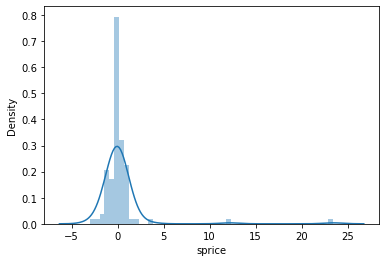

In [24]:
sns.distplot(y_test-predicted)

In [25]:
import pickle
file=open('random_forest_regression_model.pkl','wb')
with open("pickletest.pickle", "wb") as file:
    pickle.dump(rf_random, file)
file.close()